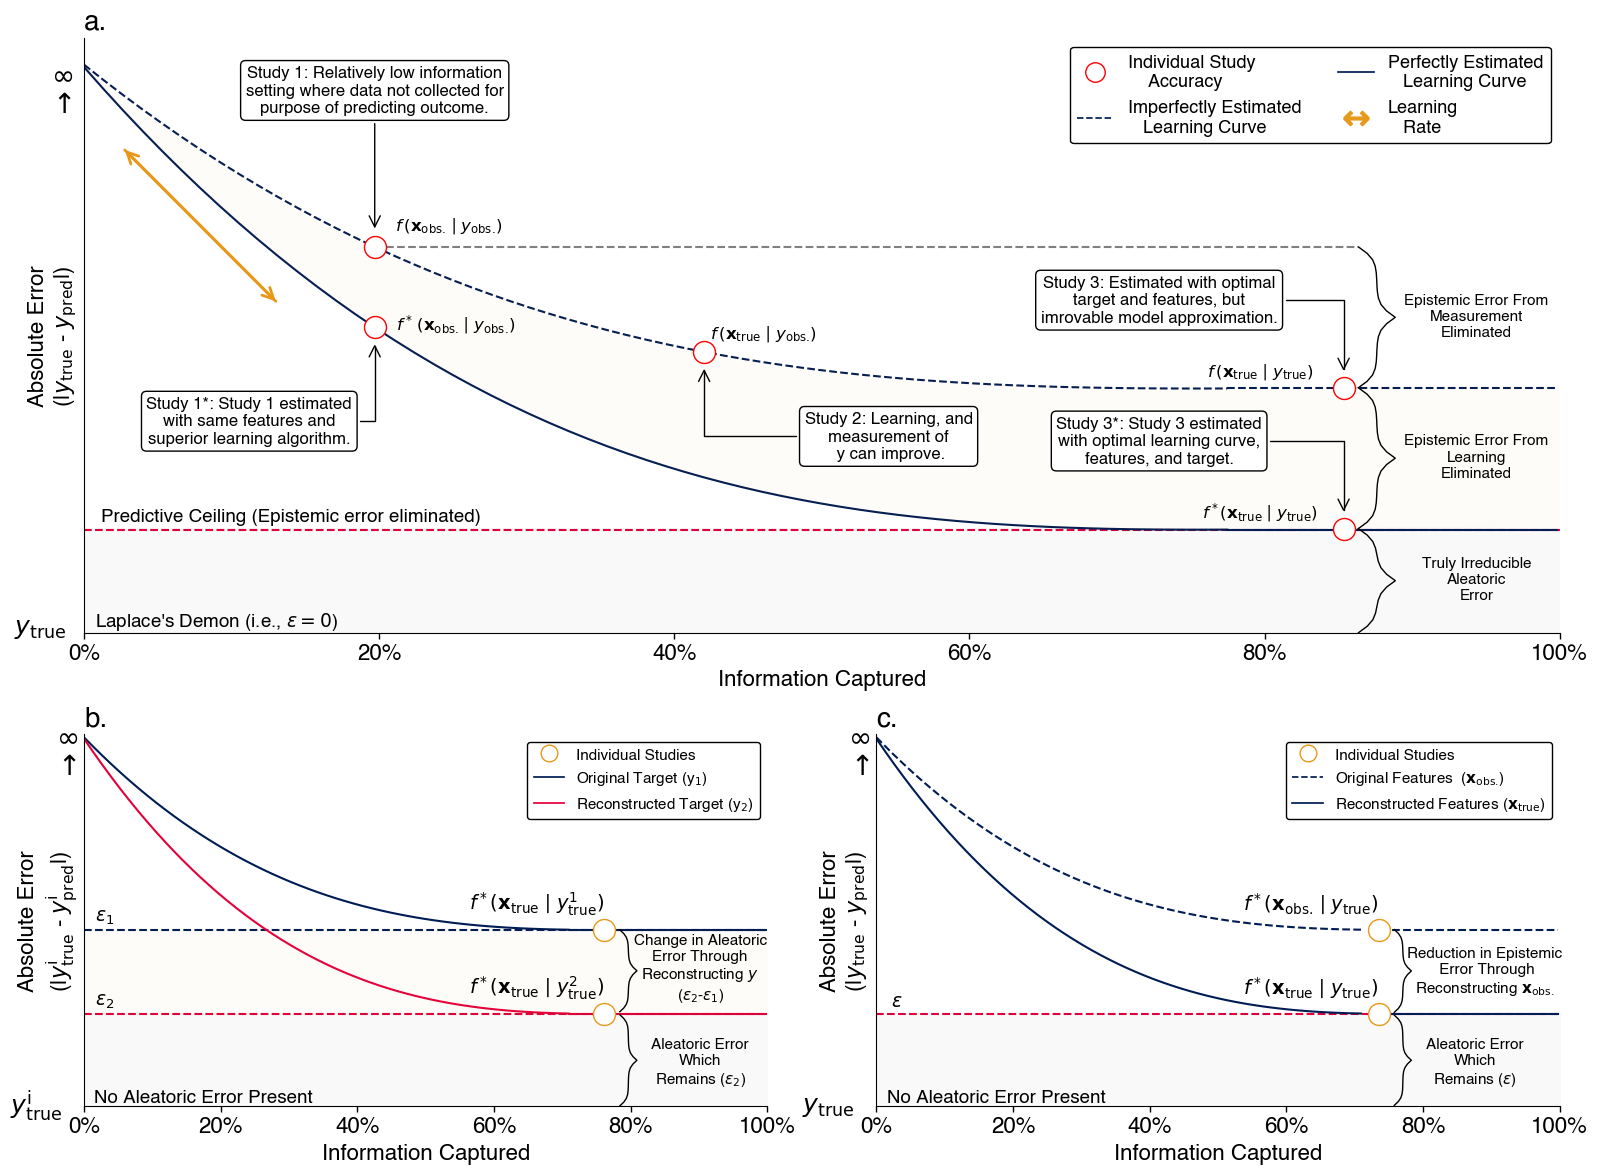

In [187]:
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from figure_helpers import draw_brace, polynomial_function
mpl.rcParams['font.family'] = 'Helvetica'
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(16, 16))
gs = GridSpec(3, 2, height_ratios=[2, 1.25, 1.25])  # Two rows for ax1 and one row split for ax2 and ax3

# Define the axes
ax1 = fig.add_subplot(gs[0, :])  # ax1 spans the entire top row
ax2 = fig.add_subplot(gs[1, 0])  # ax2 on the bottom left
ax3 = fig.add_subplot(gs[1, 1])  # ax3 on the bottom right

x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y_data_original = np.array([0, 0.25, 0.45, 0.6, 0.65, 0.675, 0.725, .75, 0.75, 0.765, 0.77, 0.77, 0.795])

y_data = 1 - y_data_original

degree = 3
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x1_fit = np.linspace(0, max(x_data) + 1, 100)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:60], y1_fit[:60], color='#001c54', linestyle='-', zorder=1)
ax1.plot(x1_fit[59:-23], [y1_fit[59]]*(len(x1_fit[59:-23])), color='#001c54', linestyle='-', zorder=1)
ax1.scatter(x1_fit[15], y1_fit[15], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[65], y1_fit[65], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1_scatter1_x = x1_fit[15]
ax1_scatter1_y = y1_fit[15]
ax1_scatter1_end_x = x1_fit[65]
ax1_scatter1_end_y = y1_fit[65]
study2star = y1_fit[35]
bracket1_x = x1_fit[65]
bracket1_y1 = y1_fit[65]
y1_fill_fit = y1_fit
y2_fit = y1_fit

y_data = y_data_original * 0.7
y_data = 1 - y_data
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:60], y1_fit[:60], color='#001c54', linestyle='--', zorder=1)
ax1.plot(x1_fit[59:-23], [y1_fit[59]]*(len(x1_fit[59:-23])), color='#001c54', linestyle='--', zorder=1)

ax1.scatter(x1_fit[15], y1_fit[15], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[32], y1_fit[32], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[65], y1_fit[65], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1_scatter2_x = x1_fit[15]
ax1_scatter2_y = y1_fit[15]
ax1_scatter2_mid_x = x1_fit[32]
ax1_scatter2_mid_y = y1_fit[32]
ax1_scatter2_end_x = x1_fit[65]
ax1_scatter2_end_y = y1_fit[65]
bracket1_y2 = y1_fit[65]
y3_fill_fit = y1_fit


legend_elements = [
    Line2D([0], [0], marker='o', color='#001c54', markerfacecolor='w',
           markeredgecolor='r', markersize=14, linewidth=0,
           label='Individual Study\n    Accuracy'),
    Line2D([0], [0], color='#001c54', linestyle='--', linewidth=1.25,
           label='Imperfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#001c54', linestyle='-', linewidth=1.25,
           label='Perfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#E89818', marker='$\leftrightarrow$', markersize=18, linewidth=0,
           label='Learning\n   Rate')
]

ax1.legend(handles=legend_elements, loc='upper right',# bbox_to_anchor=(0, 1),
       frameon=True,
       fontsize=13, framealpha=1, facecolor='w', edgecolor='black', ncols=2)

ax1.annotate(
    "Laplace's Demon (i.e., $\epsilon=0$)",
    xy=(0.09, 0.0),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)

ax1.annotate(
    'Predictive Ceiling (Epistemic error eliminated)',
    xy=(0.14, 0.18),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)

arrow1 = patches.FancyArrowPatch(
    (x1_fit[2], y1_fit[2]-.085), (x1_fit[10], y1_fit[10]-.17), 
    mutation_scale=20,
    color='#E89818', 
    arrowstyle='->',
    linewidth=2
)
arrow2 = patches.FancyArrowPatch(
    (x1_fit[10], y1_fit[10]-.17), (x1_fit[2], y1_fit[2]-.085), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)
ax1.add_patch(arrow1)
ax1.add_patch(arrow2)

fill_alpha=0.025


ax1.fill_between(x1_fit,
                 y1_fill_fit,
                 y3_fill_fit,
                 color='#E89818',
                 alpha=fill_alpha
                 )


ax1.annotate('Study 1: Relatively low information\nsetting where data not collected for\npurpose of predicting outcome.',
             xy=(ax1_scatter2_x, ax1_scatter2_y+.025),
             xytext=(ax1_scatter2_x, ax1_scatter2_y+.25),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1)
            )
ax1.annotate(
    'Study 1*: Study 1 estimated\nwith same features and\nsuperior learning algorithm.',
    xy=(ax1_scatter1_x, ax1_scatter1_y - 0.0225),
    xytext=(ax1_scatter1_x-0.85, ax1_scatter1_y - 0.15),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)

ax1.annotate(
    'Study 3*: Study 3 estimated\nwith optimal learning curve,\nfeatures, and target.',
    xy=(ax1_scatter1_end_x, ax1_scatter1_end_y + 0.0225),
    xytext=(ax1_scatter1_end_x-1.25, ax1_scatter1_end_y + 0.14),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)

ax1.annotate(
    'Study 3: Estimated with optimal\ntarget and features, but\nimrovable model approximation.',
    xy=(ax1_scatter2_end_x, ax1_scatter2_end_y + 0.0225),
    xytext=(ax1_scatter2_end_x-1.25, ax1_scatter2_end_y + 0.14),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)

ax1.annotate(
    'Study 2: Learning, and\nmeasurement of\n y can improve.',
    xy=(ax1_scatter2_mid_x, ax1_scatter2_mid_y - 0.0225),
    xytext=(ax1_scatter2_mid_x+1.25, ax1_scatter2_mid_y - 0.135),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)

for ax, title in zip([ax1, ax2, ax3], ['a.', 'b.', 'c.']):
    ax.set_title(title, fontsize=20, loc='left')
    ax.set_yticks([])
    ax.tick_params(width=1, length=4, axis='both', which='major', labelsize=16)
    ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    ax.set_xlabel('Information Captured', fontsize=16)
    ax.set_xlim(0,10)
    
ax1.set_ylabel('Absolute Error\n'
              r'(|$y_{\text{true}}$ - $y_{\text{pred}}$|)', fontsize=16)
ax2.set_ylabel('Absolute Error\n'
              r'(|$y_{\text{true}}^{\text{i}}$ - $y_{\text{pred}}^{\text{i}}$|)', fontsize=16)
ax3.set_ylabel('Absolute Error\n'
              r'(|$y_{\text{true}}$ - $y_{\text{pred}}$|)', fontsize=16)
draw_brace(ax1, (ax1_scatter2_y-ax1_scatter2_end_y),
           (ax1_scatter1_end_x+1.475, ((ax1_scatter2_y-ax1_scatter2_end_y)/2)+ax1_scatter2_end_y),
           'Epistemic Error From\nMeasurement\nEliminated',
           (ax1_scatter1_end_x+.9, (((ax1_scatter2_y-ax1_scatter2_end_y)/2)+ax1_scatter2_end_y)-.035),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)


draw_brace(ax1, (ax1_scatter2_end_y-ax1_scatter1_end_y),
           (ax1_scatter1_end_x+1.475, ((ax1_scatter2_end_y-ax1_scatter1_end_y)/2)+ax1_scatter1_end_y),
           'Epistemic Error From\nLearning\nEliminated',
           (ax1_scatter1_end_x+.9, (((ax1_scatter2_end_y-ax1_scatter1_end_y)/2)+ax1_scatter1_end_y)-.035),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)

draw_brace(ax1, (ax1_scatter1_end_y-ax1.get_ylim()[0]),
           (ax1_scatter1_end_x+1.475, ((ax1_scatter1_end_y-ax1.get_ylim()[0])/2)+ax1.get_ylim()[0]),
           'Truly Irreducible\nAleatoric\nError',
           (ax1_scatter1_end_x+.9, (((ax1_scatter1_end_y-ax1.get_ylim()[0])/2)+ax1.get_ylim()[0])-.035),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)


ax1.text(-0.15, 0.95, '$\infty$\n$↑$',
         ha='center', va='center', fontsize=20)
ax2.text(-0.25, 0.95, '$\infty$\n$↑$',
         ha='center', va='center', fontsize=20)
ax3.text(-0.25, 0.95, '$\infty$\n$↑$',
         ha='center', va='center', fontsize=20)

ax1.fill_between(x1_fit,
                 ax1.get_ylim()[0],
                 0.25,
                 color='#001c54',
                 alpha=fill_alpha
                 )

ax1.text(-0.3, 0.09, r'$y_{\text{true}}$', ha='center', va='center', fontsize=18)

ax1.text(ax1_scatter2_x+0.5, ax1_scatter2_y+.035, r"$f\, (\mathbf{x}_{\text{obs.}}\mid y_{\text{obs.}})$", ha='center', va='center', fontsize=12)
ax1.text(ax1_scatter1_x+0.55, ax1_scatter1_y+.005, r"$f^*\, (\mathbf{x}_{\text{obs.}}\mid y_{\text{obs.}})$", ha='center', va='center', fontsize=12)
ax1.text(ax1_scatter2_mid_x+.4, ax1_scatter2_mid_y+.03, r"$f\, (\mathbf{x}_{\text{true}}\mid y_{\text{obs.}})$", ha='center', va='center', fontsize=12)
ax1.text(ax1_scatter2_end_x-.565, ax1_scatter2_end_y+.0265, r"$f\, (\mathbf{x}_{\text{true}}\mid y_{\text{true}})$",
         ha='center', va='center', fontsize=12)
ax1.text(ax1_scatter1_end_x-.565, ax1_scatter1_end_y+.0265, r"$f^*(\mathbf{x}_{\text{true}}\mid y_{\text{true}})$",
         ha='center', va='center', fontsize=12)
ax1.axhline(y=0.25-.0025, color='#E4003B',
            linestyle='--',
            linewidth=1.5, zorder=-1)
ax1.axhline(y=ax1_scatter2_y, xmin= ax1_scatter2_x/10,
            xmax= ax1_scatter2_end_x/10+.01,
            color='grey',
            linestyle='--', linewidth=1.5, zorder=-1)

################# AX2 #################

ax2.plot(x1_fit[:55], y1_fit[:55], color='#001c54', linestyle='-', zorder=1)
ax2.plot(x1_fit[54:-23], [y1_fit[54]]*(len(x1_fit[54:-23])), color='#001c54', linestyle='-', zorder=1)
ax2.scatter(x1_fit[58], y1_fit[58], facecolor='w', edgecolor='#E89818', s=[250], alpha=1, marker='o', zorder=2)
ax2_scatter1_x = x1_fit[15]
ax2_scatter1_y = y1_fit[15]
ax2_scatter1_end_x = x1_fit[58]
ax2_scatter1_end_y = y1_fit[58]

ax2.plot(x1_fit[:55], y2_fit[:55], color='#E4003B', linestyle='-', zorder=1)
ax2.plot(x1_fit[54:-23], [y2_fit[54]]*(len(x1_fit[54:-23])), color='#E4003B', linestyle='-', zorder=1)
ax2.scatter(x1_fit[58], y2_fit[58], facecolor='w', edgecolor='#E89818', s=[250], alpha=1, marker='o', zorder=2)
ax2.text(-0.7, 0.0, r'$y_{\text{true}}^{\text{i}}$', ha='center', va='center', fontsize=18)
ax2_scatter2_x = x1_fit[15]
ax2_scatter2_y = y1_fit[15]
ax2_scatter2_mid_x = x1_fit[32]
ax2_scatter2_mid_y = y1_fit[32]
ax2_scatter2_end_x = x1_fit[58]
ax2_scatter2_end_y = y1_fit[58]

ax3.plot(x1_fit[:55], y1_fit[:55], color='#001c54', linestyle='--', zorder=1)
ax3.plot(x1_fit[55:-23], [y1_fit[55]]*(len(x1_fit[55:-23])), color='#001c54', linestyle='--', zorder=1)
ax3.scatter(x1_fit[56], y1_fit[56], facecolor='w', edgecolor='#E89818', s=[250], alpha=1, marker='o', zorder=2)
ax3.plot(x1_fit[:55], y2_fit[:55], color='#001c54', linestyle='-', zorder=1)
ax3.plot(x1_fit[55:-23], [y2_fit[55]]*(len(x1_fit[55:-23])), color='#001c54', linestyle='-', zorder=1)
ax3.scatter(x1_fit[56], y2_fit[56], facecolor='w', edgecolor='#E89818', s=[250], alpha=1, marker='o', zorder=2)
ax3.text(-0.7, 0.0, r'$y_{\text{true}}$', ha='center', va='center', fontsize=18)

ax2.fill_between(x1_fit,
                 y1_fit[58],
                 y2_fit[58],
                 color='#E89818',
                 alpha=fill_alpha
                 )
ax2.set_ylim(0, 1)
ax3.set_ylim(0, 1)


ax2.axhline(y=y1_fit[58]+0.0005, color='#001c54',
            linestyle='--',
            linewidth=1.5, zorder=-1)
ax2.axhline(y=y2_fit[58], color='#E4003B',
            linestyle='--',
            linewidth=1.5, zorder=-1)
ax3.axhline(y=y2_fit[56], color='#E4003B',
            linestyle='--',
            linewidth=1.5, zorder=-1)

ax2.fill_between(x1_fit,
                 ax2.get_ylim()[0],
                 0.25,
                 color='#001c54',
                 alpha=fill_alpha
                 )
ax3.fill_between(x1_fit,
                 ax3.get_ylim()[0],
                 0.25,
                 color='#001c54',
                 alpha=fill_alpha
                 )


legend_elements = [
    Line2D([0], [0], marker='o', markerfacecolor='w',
           markeredgecolor='#E89818', markersize=12, linewidth=0,
           label='Individual Studies'),
    Line2D([0], [0], color='#001c54', linestyle='-', linewidth=1.25,
           label='Original Target (y$_1$)'),
    Line2D([0], [0], color='#E4003B', linestyle='-', linewidth=1.25,
           label='Reconstructed Target (y$_2$)'),
]

ax2.legend(handles=legend_elements, loc='upper right',# bbox_to_anchor=(0, 1),
           frameon=True,
           fontsize=11, framealpha=1, facecolor='w', edgecolor='black', ncols=1)

ax2.annotate(
    'No Aleatoric Error Present',
    xy=(0.175, 0.0),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)

ax2.annotate(
    '$\epsilon_2$',
    xy=(0.03, y2_fit[58]+.01),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)

ax2.annotate(
    '$\epsilon_1$',
    xy=(0.03, y1_fit[58]+.01),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)



ax3.annotate(
    'No Aleatoric Error Present',
    xy=(0.175, 0.0),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)

ax3.annotate(
    '$\epsilon$',
    xy=(0.03, y2_fit[56]+.01),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)

'''
ax3.annotate(
    '$\epsilon+\delta_x$',
    xy=(0.03, y1_fit[58]+.01),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)
'''

ax2.text(x1_fit[58]-1, y1_fit[58]+.07,
         r"$f^*(\mathbf{x}_{\text{true}}\mid y_{\text{true}}^1)$", ha='center', va='center', fontsize=14)
ax2.text(x1_fit[58]-1, y2_fit[58]+.07,
         r"$f^*(\mathbf{x}_{\text{true}}\mid y_{\text{true}}^2)$", ha='center', va='center', fontsize=14)

ax3.text(x1_fit[56]-1, y1_fit[56]+.07,
        r"$f^*(\mathbf{x}_{\text{obs.}} \mid y_{\text{true}})$", ha='center', va='center', fontsize=14)
ax3.text(x1_fit[56]-1, y2_fit[56]+.07,
         r"$f^*(\mathbf{x}_{\text{true}} \mid y_{\text{true}})$", ha='center', va='center', fontsize=14)





draw_brace(ax2, .22,
           (x1_fit[58]+1.6, y1_fit[58]-0.11),
           'Change in Aleatoric\nError Through\nReconstructing $y$\n($\epsilon_2$-$\epsilon_1$)',
           (x1_fit[58]+1.4, y1_fit[58]-0.2),
           brace_scale=0.25, beta_scale=1000., rotate=True,
           rotate_text=False)

draw_brace(ax2, .245,
           (x1_fit[58]+1.6, y2_fit[58]-0.125),
           'Aleatoric Error\nWhich\nRemains ($\epsilon_2$)',
           (x1_fit[58]+1.4, y2_fit[58]-0.20),
           brace_scale=0.25, beta_scale=1000., rotate=True,
           rotate_text=False)



draw_brace(ax3, .2225,
           (x1_fit[56]+1.6, y1_fit[56]-0.1105),
           'Reduction in Epistemic\n Error Through\n'+
           r'Reconstructing $\mathbf{x}_{\text{obs.}}$',
           (x1_fit[56]+1.55, y1_fit[56]-0.18),
           brace_scale=0.25, beta_scale=1000., rotate=True,
           rotate_text=False)

draw_brace(ax3, .2425,
           (x1_fit[56]+1.6, y2_fit[56]-0.125),
           'Aleatoric Error\nWhich\nRemains ($\epsilon$)',
           (x1_fit[56]+1.4, y2_fit[56]-0.20),
           brace_scale=0.25, beta_scale=1000., rotate=True,
           rotate_text=False)

legend_elements = [
    Line2D([0], [0], marker='o', markerfacecolor='w',
           markeredgecolor='#E89818', markersize=12, linewidth=0,
           label='Individual Studies'),
    Line2D([0], [0], color='#001c54', linestyle='--', linewidth=1.25,
           label=r'Original Features  ($\mathbf{x}_{\text{obs.}}$)'),
    Line2D([0], [0], color='#001c54', linestyle='-', linewidth=1.25,
           label=r'Reconstructed Features ($\mathbf{x}_{\text{true}}$)'),
]

ax3.legend(handles=legend_elements, loc='upper right',# bbox_to_anchor=(0, 1),
           frameon=True,
           fontsize=11, framealpha=1, facecolor='w', edgecolor='black', ncols=1)

sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(),
                             '..',
                             'output',
                             'unpredictability_figure_new_1.pdf'),
                bbox_inches='tight')

plt.savefig(os.path.join(os.getcwd(),
                             '..',
                             'output',
                             'unpredictability_figure_new_1.png'),
                bbox_inches='tight')

In [164]:
ax1.get_ylim()[0]


0.08319995698553947